In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity,euclidean_distances
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from textblob import TextBlob
import nltk
%matplotlib inline

In [12]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english')

In [13]:
def sentence_tokenizer(paragraph,tokenizer="textblob"):
    if tokenizer=="spacy":
        doc = nlp(paragraph)
        sentences = [sent.text for sent in doc.sents]
        return sentences,len(sentences)
    elif tokenizer=="nltk":    
        sentences = TextBlob(paragraph)
        return sentences,len(sentences)
    else:
        sentences = nltk.tokenize.sent_tokenize(paragraph)
        return sentences,len(sentences)

In [14]:
train_df = pd.read_csv("post_glove.csv")
train_df = train_df.drop(columns=['sentences'])

In [15]:
train_df["overlap_cosine"]=train_df.apply(lambda row: 1 if row[10]==row[11] else 0,axis=1)
train_df

Unnamed: 0                                           question  \
0               0           When did Beyonce start becoming popular?   
1               1  What areas did Beyonce compete in when she was...   
2               2  When did Beyonce leave Destiny's Child and bec...   
3               3      In what city and state did Beyonce  grow up?    
4               4         In which decade did Beyonce become famous?   
...           ...                                                ...   
86816       86816  In what US state did Kathmandu first establish...   
86817       86817               What was Yangon previously known as?   
86818       86818  With what Belorussian city does Kathmandu have...   
86819       86819  In what year did Kathmandu create its initial ...   
86820       86820                      What is KMC an initialism of?   

                                               paragraph  \
0      Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...   
1      Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...   
2      Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...   
3      Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...   
4      Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...   
...                                                  ...   
86816  Kathmandu Metropolitan City (KMC), in order to...   
86817  Kathmandu Metropolitan City (KMC), in order to...   
86818  Kathmandu Metropolitan City (KMC), in order to...   
86819  Kathmandu Metropolitan City (KMC), in order to...   
86820  Kathmandu Metropolitan City (KMC), in order to...   

                       answer_span  start  end  q_len  p_len  answer_span_len  \
0                in the late 1990s    269  286      6    109                4   
1              singing and dancing    207  226     11    109                3   
2                             2003    526  530     11    109                1   
3                   Houston, Texas    166  180      9    109                2   
4                       late 1990s    276  286      7    109                2   
...                            ...    ...  ...    ...    ...              ...   
86816                       Oregon    229  235     11    110                1   
86817                      Rangoon    414  421      6    110                1   
86818                        Minsk    476  481      9    110                1   
86819                         1975    199  203     10    110                1   
86820  Kathmandu Metropolitan City      0   27      6    110                3   

       sentences_len  target  cosine_sim  overlap_cosine  
0                  4       2           0               0  
1                  4       2           1               0  
2                  4       4           1               0  
3                  4       2           1               0  
4                  4       2           1               0  
...              ...     ...         ...             ...  
86816              4       2           0               0  
86817              4       3           1               0  
86818              4       3           0               0  
86819              4       2           0               0  
86820              4       1           1               1  

[86821 rows x 13 columns]

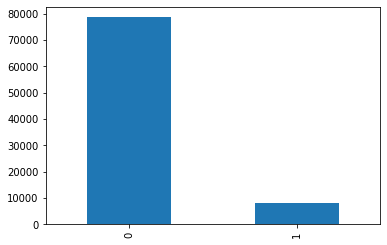

In [16]:
train_df["overlap_cosine"].value_counts().plot(kind='bar')
plt.show()

In [28]:
train_df["sentences"]=train_df["paragraph"].map(lambda paragraph: sentence_tokenizer(paragraph)[0])
train_df.head()

Unnamed: 0                                           question  \
0           0           When did Beyonce start becoming popular?   
1           1  What areas did Beyonce compete in when she was...   
2           2  When did Beyonce leave Destiny's Child and bec...   
3           3      In what city and state did Beyonce  grow up?    
4           4         In which decade did Beyonce become famous?   

                                           paragraph          answer_span  \
0  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...    in the late 1990s   
1  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...  singing and dancing   
2  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...                 2003   
3  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...       Houston, Texas   
4  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...           late 1990s   

   start  end  q_len  p_len  answer_span_len  sentences_len  target  \
0    269  286      6    109                4              4       2   
1    207  226     11    109                3              4       2   
2    526  530     11    109                1              4       4   
3    166  180      9    109                2              4       2   
4    276  286      7    109                2              4       2   

   cosine_sim  overlap_cosine  \
0           0               0   
1           1               0   
2           1               0   
3           1               0   
4           1               0   

                                           sentences  tfidf_max_index  
0  [Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ ...              NaN  
1  [Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ ...              NaN  
2  [Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ ...              NaN  
3  [Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ ...              NaN  
4  [Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ ...              NaN

In [21]:
train_df["sentences"].head()

0    [Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ ...
1    [Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ ...
2    [Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ ...
3    [Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ ...
4    [Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ ...
Name: sentences, dtype: object

In [26]:
def get_tfidf(question,sentences):
    index = 0
    documents = [question] + sentences
    tfidf_matrix = tf.fit_transform(documents)
    sims = cosine_similarity(tfidf_matrix[index], tfidf_matrix[index+1:]).flatten()
    return np.argmax(sims)


In [27]:
train_df["tfidf_max_index"]=train_df.apply(lambda row: get_tfidf(row[1],row[13]))

1 13
What areas did Beyonce compete in when she was growing up? What was Beyoncé's role in Destiny's Child?
Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny's Child. Managed by her father, Mathew Knowles, the group became one of the world's best-selling girl groups of all time. Their hiatus saw the release of Beyoncé's debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy". Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed i